## Гамма-распределение

$$f(x) = \frac{x^{\alpha - 1}e^{-x}}{\Gamma (\alpha)}$$

Гамма-распределение описывает **время до наступления k-го события** в потоке событий, происходящих случайно и независимо с постоянной средней скоростью.

Это обобщение экспоненциального распределения:

- если k=1 - получаем обычное экспоненциальное распределение (время до первого события).

PS: Гамма-фнкция - это непрерывное продолжение факториала:)

In [ ]:
from scipy.stats import gamma, norm
import statistics as st
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# help(plt.plot)

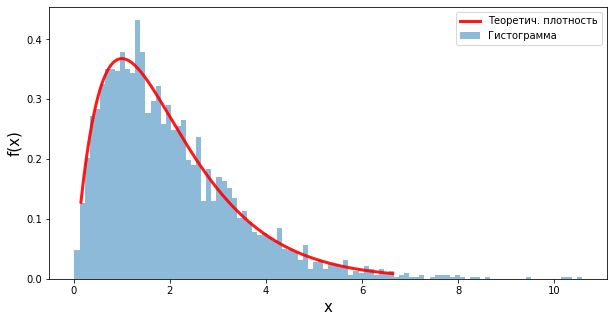

In [ ]:
# генерация распределения
a = 2 # параметр альфа
# набор значений случ. величины, кот. исп. для гистограммы
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 3000)
r = gamma.rvs(a, size=3000) # распределение для построение теоретической функции плотности

# построение графиков
plt.figure(figsize=(10, 5))
plt.plot(x, gamma.pdf(x, a), 'r-', lw=3, alpha=0.9, label='Теоретич. плотность')
plt.hist(r, bins=100, density=True, alpha=0.5, label='Гистограмма')
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)',fontsize=15)
plt.legend()
plt.show()

### Выборка объёма n=3

In [ ]:
# help(gamma.rvs)

**Идея (построчно по коду следующей ячейки):**
- генерируем 1000 выборок размера 3 из гамма-распределения и для каждой считаем выборочное среднее — таким образом выполняем повторение эксперимента много раз при одном и том же n <=> имитируем увеличение объёма выборки
- выводим теоретические среднее (матожидание) и дисперсию для гамма-распределения с заданным параметром альфа
- вычисляем стандартное отклонение как корень из дисперсии
- ..
- ..
- строим график плотности нормального распределения с заданным средним и стандартным отклонением из соответствующего гамма-распределения (красная линия на графике) - это теоретическое распределение!
- строим гистограмму сгенерированных данных из гамма-распределения (голубая гистограмма) - это "экспериментамльные данные"; видим, что при увеличении n распределения средних приближаются к нормальному.

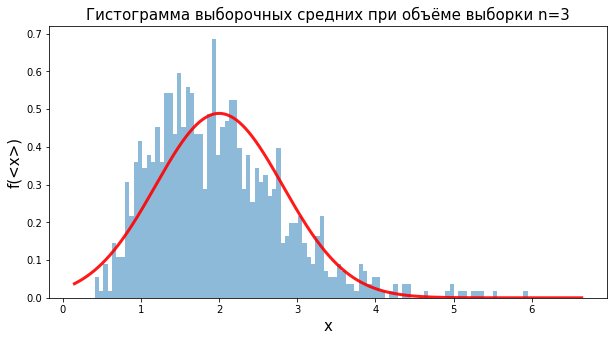

In [ ]:
means_3 = [np.mean(gamma.rvs(a, size=3)) for x in range(1000)] # массив выборочных средних
mu_3, var_3, _, __ = gamma.stats(a, moments='mvsk') # вычисление среднего и дисперсии
sigma_3 = sqrt(var_3/3) # стандартное отклонение для построения соответствующего нормального распределения

plt.figure(figsize=(10, 5))
plt.plot(x, norm.pdf(x, mu_3, sigma_3), 'r-', lw=3, alpha=0.9)
plt.hist(means_3, bins=100, density=True, alpha=0.5)
plt.title('Гистограмма выборочных средних при объёме выборки n=3', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(<x>)',fontsize=15)
plt.show()

### Выборка объёма n=5

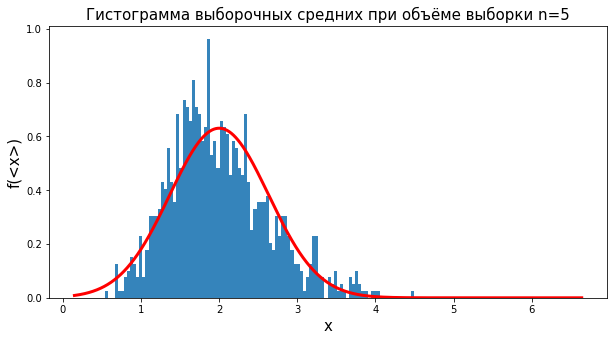

In [ ]:
means_5 = [np.mean(gamma.rvs(a, size=5)) for x in range(1000)]
mu_5, var_5, _, __ = gamma.stats(a, moments='mvsk')
sigma_5 = sqrt(var_5/5)

plt.figure(figsize=(10, 5))
plt.plot(x, norm.pdf(x, mu_5, sigma_5), 'r-', lw=3, alpha=1)
plt.hist(means_5, bins=100, density=True, alpha=0.9)
plt.title('Гистограмма выборочных средних при объёме выборки n=5', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(<x>)',fontsize=15)
plt.show()

### Выборка объёма n=10

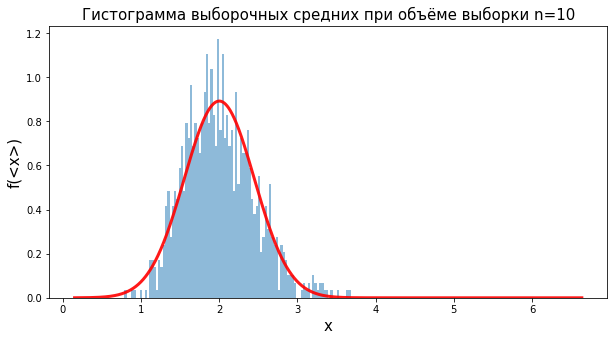

In [ ]:
means_10 = [np.mean(gamma.rvs(a, size=10)) for x in range(1000)]
mu_10, var_10, _, __ = gamma.stats(a, moments='mvsk')
sigma_10 = sqrt(var_10/10)

plt.figure(figsize=(10, 5))
plt.plot(x, norm.pdf(x, mu_10, sigma_10), 'r-', lw=3, alpha=0.9)
plt.hist(means_10, bins=100, density=True, alpha=0.5)
plt.title('Гистограмма выборочных средних при объёме выборки n=10', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(<x>)',fontsize=15)
plt.show()

### Выборка объёма n=50

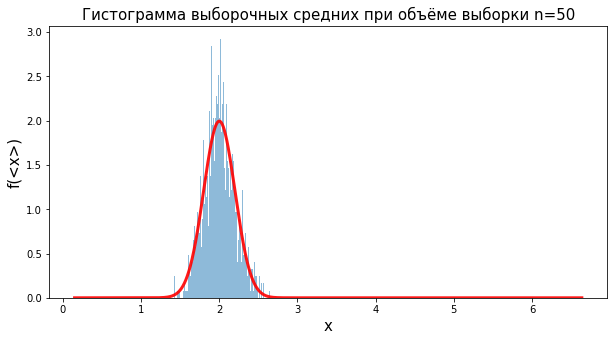

In [ ]:
means_50 = [np.mean(gamma.rvs(a, size=50)) for x in range(1000)]
mu_50, var_50, _, __ = gamma.stats(a, moments='mvsk')
sigma_50 = sqrt(var_50/50)

plt.figure(figsize=(10, 5))
plt.plot(x, norm.pdf(x, mu_50, sigma_50), 'r-', lw=3, alpha=0.9)
plt.hist(means_50, bins=100, density=True, alpha=0.5)
plt.title('Гистограмма выборочных средних при объёме выборки n=50', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(<x>)',fontsize=15)
plt.show()

### Вывод:
Построенные графики подтвержают Центральную предельную теорему: чем больше объём выборки, тем сильнее распределение средних приближается к нормальному. Причём  аппроксимации графиком нормального распределения (с соответствующими параметрами среднего и стандартного отклонения для каждой выборки) тем лучше, чем больше выборка.